In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv("datasets_train1.csv") # read data from dataset with pandas
data_train.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [3]:
X = data_train.values[:, 0]
Y = data_train.values[:, 1]
print(len(X), len(Y))

699 699


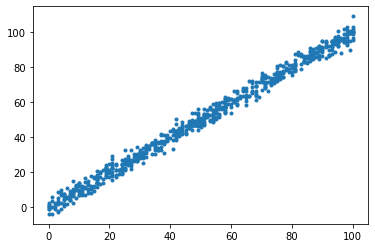

In [4]:
plt.scatter(X, Y, marker='.')

In [5]:
# TODO: hypothesis function y = theta0 + theta1*x
def hypothesis(theta0, theta1, x):
    return theta0 + theta1 * x

# TODO: cost function (Mean square error)
def MSE(X, Y, theta0, theta1):
    m = len(X)
    sum_error = 0
    
    for i in range(m):
        sum_error += ((theta0 + theta1 * X[i]) - Y[i])**2
    
    return (sum_error / (2 * m))

# TODO: predict function
def gradient_descent(theta0, theta1, learning_rate, X, Y):
    theta0_temp = 0.0
    theta1_temp = 0.0
    m = len(X)
    
    for i in range(m):
        theta1_temp += X[i]*((theta0 + theta1 * X[i]) - Y[i])
        theta0_temp += ((theta0 + theta1 * X[i]) - Y[i])
    
    theta0 -= (theta0_temp / m) * learning_rate
    theta1 -= (theta1_temp/m) * learning_rate
    
    return theta0, theta1

def train(X, Y, theta0, theta1, learning_rate, ite):
    cost_his = []
    for i in range(ite):
        theta0, theta1 = gradient_descent(theta0, theta1, learning_rate, X, Y)
        cost = MSE(X, Y, theta0, theta1)
        cost_his.append(cost)
    return theta0, theta1, cost_his

#print(X, Y)
print(len(X))
theta0, theta1, cost = train(X, Y, 2, 3, 0.0001, 300)
print("Ket qua:")
print(theta0)
print(theta1)
print(cost)

699
Ket qua:
1.9540187412865515
0.9697747239336343
[3059.049950817318, 1359.61539453073, 605.6732297705694, 271.1920931123286, 122.8018818529303, 56.96959658888681, 27.763552664257205, 14.806482275653611, 9.058154344216872, 6.507934139731708, 5.376531863198821, 4.874578149970786, 4.651874851216331, 4.553059029206487, 4.509205012859497, 4.489734414539849, 4.481081348334259, 4.477227404678219, 4.475502558634356, 4.474722272478859, 4.474361034408615, 4.474185704820173, 4.474092852973447, 4.474036592550372, 4.473996566409671, 4.47396374324922, 4.473934116395516, 4.473905908316082, 4.47387833042117, 4.473851032858448, 4.473823860418341, 4.473796744243214, 4.473769653784799, 4.473742575490537, 4.4737155033479, 4.473688434689438, 4.473661368331715, 4.473634303749653, 4.473607240710309, 4.473580179110244, 4.473553118903578, 4.473526060069897, 4.4734990026001045, 4.473471946490141, 4.473444891738161, 4.473417838343302, 4.47339078630515, 4.47336373562349, 4.473336686298171, 4.473309638329092, 4.

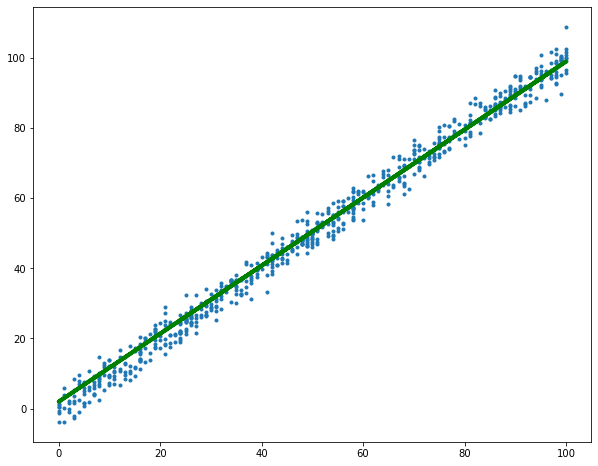

In [6]:
%matplotlib inline
plt.figure(figsize=(10, 8))
plt.scatter(data_train.x, data_train.y, marker=".")
#print(data_train.x.values)

#plt.plot(data_train.x.values, 2*data_train.x.values + 3, color ="red")
plt.plot(data_train.x.values, theta1*data_train.x.values + theta0, color="green", linewidth=4)

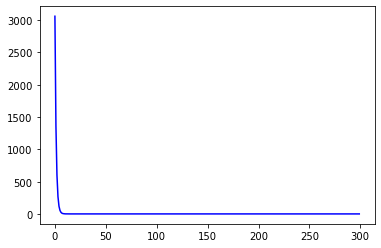

In [7]:
plt.plot(range(300), cost, color="blue") # Convergence of cost function

In [8]:
test = pd.read_csv("datasets_test.csv")
x_test = test.values[:, 0]
y_test = test.values[:, 1]
print(x_test)

[ 77.  21.  22.  20.  36.  15.  62.  95.  20.   5.   4.  19.  96.  62.
  36.  15.  65.  14.  87.  69.  89.  51.  89.  27.  97.  58.  79.  21.
  93.  27.  99.  31.  33.  80.  28.  47.  53.  69.  28.  33.  91.  71.
  50.  76.   4.  37.  70.  68.  40.  35.  94.  88.  52.  31.  59.   0.
  39.  64.  69.  57.  13.  72.  76.  61.  82.  18.  41.  50.  55.  13.
  46.  13.  79.  53.  15.  28.  81.  69.  52.  84.  68.  27.  56.  48.
  40.  39.  82. 100.  59.  43.  67.  38.  63.  91.  60.  14.  21.  87.
  73.  32.   2.  82.  19.  74.  42.  12.   1.  90.  89.   0.  41.  16.
  94.  97.  66.  24.  17.  90.  13.   0.  64.  96.  98.  12.  41.  47.
  78.  20.  89.  29.  64.  75.  12.  25.  28.  30.  65.  59.  64.  53.
  71.  97.  73.   9.  12.  63.  99.  60.  35.   2.  60.  32.  94.  84.
  63.  22.  81.  93.  33.   7.  42.  46.  54.  16.  49.  43.  95.  66.
  21.  35.  80.  37.  54.  56.   1.  32.  58.  32.  46.  72.  17.  97.
  93.  91.  37.   4.  54.  51.  27.  46.  92.  73.  77.  91.  61.  99.
   4. 

In [9]:
y_predicts = []
for i in range(len(x_test)):
    y_predicts.append(hypothesis(theta0, theta1, x_test[i]))

print(y_predicts)

[76.62667248417638, 22.31928794389287, 23.289062667826503, 21.349513219959235, 36.86590880289739, 16.500639600291066, 62.080051625171876, 94.0826175149818, 21.349513219959235, 6.802892360954723, 5.833117637021089, 20.379738496025603, 95.05239223891544, 62.080051625171876, 36.86590880289739, 16.500639600291066, 64.98937579697278, 15.530864876357432, 86.32441972351273, 68.86847469270731, 88.26396917138, 51.4125296619019, 88.26396917138, 28.137936287494675, 96.02216696284907, 58.20095272943734, 78.56622193204366, 22.31928794389287, 92.14306806711454, 28.137936287494675, 97.96171641071633, 32.01703518322921, 33.95658463109648, 79.53599665597729, 29.10771101142831, 47.53343076616736, 53.35207910976917, 68.86847469270731, 29.10771101142831, 33.95658463109648, 90.20351861924726, 70.80802414057457, 50.44275493796827, 75.65689776024276, 5.833117637021089, 37.83568352683102, 69.83824941664095, 67.89869996877368, 40.74500769863192, 35.896134078963755, 93.11284279104817, 87.29419444744636, 52.3823

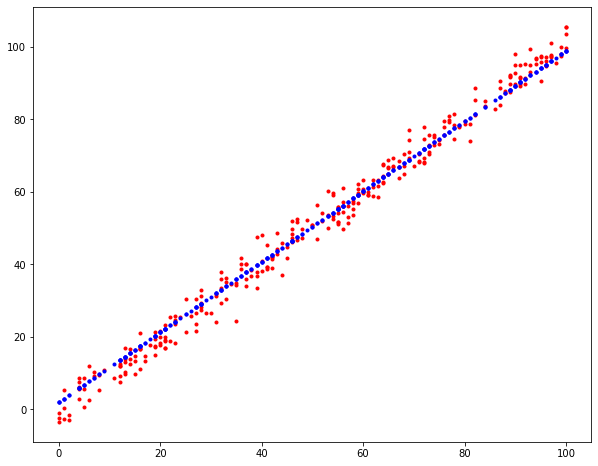

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(x_test, y_test, color="red", marker='.')
plt.scatter(x_test, y_predicts, color="blue", marker='.')